<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/20220103_Tutorial_vectorbt_cripto_data_binance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Dados de Cripto da Binance com biblioteca vectorbt </b>


Código original utilizado para a criação do post de nome correspondente no Instagram

Link: https://www.instagram.com/p/CYSWx9eLh_Y/


A equipe Trading com Dados agradece o aluno André Timotheo que sugeriu a implementação da biblioteca vectorbt nas nossas aulas e materiais e criou a versão original deste código, que foi adaptada para a criação do tutorial no Instagram. Muito obrigado André!


Documentação:
[**vectorbt doc**](https://vectorbt.dev/docs/index.html#limitations)

## 1. Instalação das bibliotecas necessárias

In [1]:
!pip install vectorbt
!pip install python-binance

     |████████████████████████████████| 496 kB 4.2 MB/s 
     |████████████████████████████████| 26.5 MB 2.0 MB/s 
     |████████████████████████████████| 288 kB 40.8 MB/s 
     |████████████████████████████████| 3.4 MB 33.6 MB/s 
     |████████████████████████████████| 25.3 MB 11.0 MB/s 
  Created wheel for vectorbt: filename=vectorbt-0.23.0-py3-none-any.whl size=538796 sha256=b6ba6f6021008ad8375dd504f4506c921f56095b2e7614592d848efb7a5497c9
  Stored in directory: /root/.cache/pip/wheels/9d/f6/dc/d659a1e8ac8a6c9d19996f4ef13492d7d03f0ac545466a6d7d
Successfully built vectorbt
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.

## 2. Importação de bibliotecas necessárias

Precisamos obviamente da vectorbt
A biblioteca python-binance é importada no background da vectorbt, não sendo necessária sua importação, apenas instalação

Além disso, recomendamos a instalação da plotly para criar os gráficos interativos

In [6]:
import vectorbt as vbt
import plotly.express as px

## 3. Obtenção inicial de dados

In [30]:
dados = vbt.BinanceData.download('BTCBRL', start='2021-11-01', interval='1d')

0it [00:00, ?it/s]

In [31]:
type(dados)

vectorbt.data.custom.BinanceData

In [32]:
dados.get()

,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2021-11-01 00:00:00+00:00,349925.0,354936.0,340186.0,349086.0,334.97110,2021-11-01 23:59:59.999000+00:00,1.170954e+08,29574,161.84267,5.659211e+07
2021-11-02 00:00:00+00:00,349259.0,367000.0,347521.0,360415.0,349.74169,2021-11-02 23:59:59.999000+00:00,1.253169e+08,34554,205.20599,7.356288e+07
2021-11-03 00:00:00+00:00,360526.0,362179.0,343901.0,353906.0,368.35652,2021-11-03 23:59:59.999000+00:00,1.311752e+08,35564,188.26566,6.708218e+07
2021-11-04 00:00:00+00:00,354043.0,354953.0,343001.0,348246.0,388.07626,2021-11-04 23:59:59.999000+00:00,1.350672e+08,36465,182.31251,6.347443e+07
2021-11-05 00:00:00+00:00,348246.0,354452.0,339218.0,342868.0,397.77205,2021-11-05 23:59:59.999000+00:00,1.371712e+08,36708,202.86846,6.998514e+07
...,...,...,...,...,...,...,...,...,...,...
2021-12-30 00:00:00+00:00,266975.0,280000.0,263500.0,265750.0,245.15260,2021-12-30 23:59:59.999000+00:00,6.572779e+07,22902,124.89225,3.349357e+07
2021-12-31 00:00:00+00:00,265634.0,273059.0,257721.0,260593.0,151.47185,2021-12-31 23:59:59.999000+00:00,4.027997e+07,17612,71.36215,1.901312e+07
2022-01-01 00:00:00+00:00,260570.0,270044.0,260544.0,268897.0,67.21252,2022-01-01 23:59:59.999000+00:00,1.784255e+07,8662,33.52253,8.901114e+06


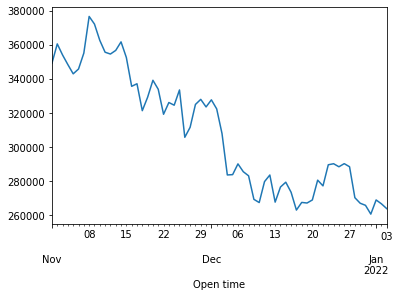

In [62]:
dados.get().Close.plot();

## 4. Explorando outros dataframes

In [34]:
BTC_USD = vbt.BinanceData.download('BTCUSDT', 
                                   start='2022-01-01', interval='1m').get()

0it [00:00, ?it/s]

In [35]:
BTC_USD.head()

,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2022-01-01 00:00:00+00:00,46216.93,46271.08,46208.37,46250.00,40.57574,2022-01-01 00:00:59.999000+00:00,1.875978e+06,796,27.26086,1.260270e+06
2022-01-01 00:01:00+00:00,46250.00,46344.23,46234.39,46312.76,42.38106,2022-01-01 00:01:59.999000+00:00,1.961908e+06,973,28.92522,1.339049e+06
2022-01-01 00:02:00+00:00,46312.76,46381.69,46292.75,46368.73,51.29955,2022-01-01 00:02:59.999000+00:00,2.377414e+06,1238,22.74786,1.054135e+06
2022-01-01 00:03:00+00:00,46368.73,46391.49,46314.26,46331.08,30.45894,2022-01-01 00:03:59.999000+00:00,1.412004e+06,953,16.12179,7.473086e+05
2022-01-01 00:04:00+00:00,46331.07,46336.10,46300.00,46321.34,20.96029,2022-01-01 00:04:59.999000+00:00,9.710099e+05,591,11.49082,5.323199e+05


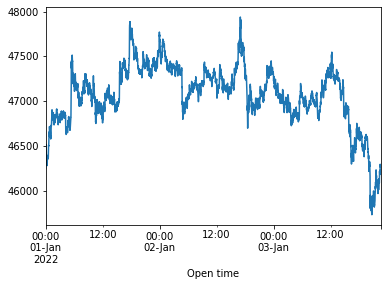

In [63]:
BTC_USD.Close.plot();

0it [00:00, ?it/s]

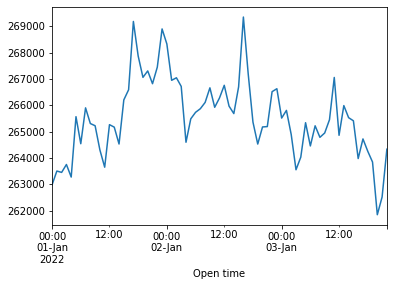

In [37]:
BTC_BRL = vbt.BinanceData.download('BTCBRL', start='2022-01-01', interval='1h').get()

BTC_BRL.Close.plot()

## 5. Retorno percentual de criptomoedas

In [38]:
# plotando percentual de retorno Bitcoin
return_btc = BTC_USD.loc[:, 'Close'].pct_change()

fig = px.line(return_btc, title='Bitcoin Percent Change')
fig.show()

## 6. Analisando mais de uma moeda de uma vez

In [55]:
# dados do Bitcoin, Ethereum e Doge simultaneamente em tupla

dados_btc_eth = vbt.BinanceData.download(['BTCBRL', 'ETHBRL', 'DOGEBRL'], 
                                         start='2022-01-01', interval='1m').get()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [56]:
type(dados_btc_eth)

tuple

In [57]:
dados_btc_eth[0]

symbol,BTCBRL,ETHBRL,DOGEBRL
Open time,,,
2022-01-01 00:00:00+00:00,260570.0,20744.65,0.960
2022-01-01 00:01:00+00:00,260890.0,20770.62,0.960
2022-01-01 00:02:00+00:00,261105.0,20798.27,0.964
2022-01-01 00:03:00+00:00,261445.0,20843.90,0.964
2022-01-01 00:04:00+00:00,261345.0,20807.75,0.964
...,...,...,...
2022-01-03 22:37:00+00:00,264641.0,21524.72,0.971
2022-01-03 22:38:00+00:00,264597.0,21525.16,0.971
2022-01-03 22:39:00+00:00,265010.0,21546.13,0.972


In [64]:
btc_eth_doge = dados_btc_eth[3]

In [65]:
normalizado = btc_eth_doge/btc_eth_doge.iloc[0]

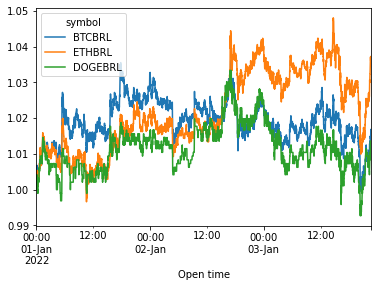

In [66]:
normalizado.plot();

In [61]:
# plotando retornos simples das moedas 

return_btc_eth = dados_btc_eth[3].pct_change()

fig = px.line(return_btc_eth, title = 'Bitcoin, Ethereum and Doge percent change')
fig.show()

In [54]:
# plot histograma numero de trades das moedas

n_trades = dados_btc_eth[7]

fig = px.histogram(n_trades, title = 'Number of trades Histogram')
fig.show()